In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
df=pd.read_csv('DATA/output1.csv')
df.head()

,MARK,RAM,typeRam,CPU_Brand,CPU_Modifier,CPU_Generation,GPU,STOCKAGEHDD,STOCKAGESSD,TypeStockage,Stockage,COULEUR,POIDS,ECRAN,PRIX,RATE
0,Lenovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gris,1,"6""",175.00 Dhs,4.3 out of 5
1,DELL,4go,ddr3,intel,i3,4.0,: intel hd graphics family,NaN,NaN,NaN,NaN,noir,2.42,15pouce,"1,499.00 Dhs",4.5 out of 5
2,Hp,8gb,ddr4,intel,i5,6.0,. intel hd graphics 520,NaN,256.0,ssd,NaN,gris,1.28,NaN,"2,490.00 Dhs",3.7 out of 5
3,Hp,4go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,1,6pouce,"3,329.00 Dhs",0 out of 5
4,Hp,16gb,ddr4,intel,i5,6.0,. intel hd graphics 520,NaN,NaN,NaN,NaN,gris,1.5,NaN,"2,899.00 Dhs",4 out of 5


## Visualisation & Cleaning

after importing our data it's time to see summary of information about our dataframe and some statictics

In [2]:
print(" Basic Info\n")
print(df.info())

# Display summary statistics
print("\n Summary Statistics\n")
print(df.describe())

#Check for missing values
print("\nMissing Values\n")
print(df.isnull().sum())

 Basic Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MARK            626 non-null    object 
 1   RAM             601 non-null    object 
 2   typeRam         484 non-null    object 
 3   CPU_Brand       529 non-null    object 
 4   CPU_Modifier    491 non-null    object 
 5   CPU_Generation  529 non-null    float64
 6   GPU             383 non-null    object 
 7   STOCKAGEHDD     23 non-null     float64
 8   STOCKAGESSD     332 non-null    float64
 9   TypeStockage    440 non-null    object 
 10  Stockage        122 non-null    float64
 11  COULEUR         571 non-null    object 
 12  POIDS           599 non-null    object 
 13  ECRAN           332 non-null    object 
 14  PRIX            626 non-null    object 
 15  RATE            626 non-null    object 
dtypes: float64(4), object(12)
memory usage: 78.4+ KB
None

 Summary Sta

In [3]:
df.duplicated().sum()

26

In [4]:
df.isnull().sum()

MARK                0
RAM                25
typeRam           142
CPU_Brand          97
CPU_Modifier      135
CPU_Generation     97
GPU               243
STOCKAGEHDD       603
STOCKAGESSD       294
TypeStockage      186
Stockage          504
COULEUR            55
POIDS              27
ECRAN             294
PRIX                0
RATE                0
dtype: int64

In [5]:
df= df.drop_duplicates()

# Mark

In [6]:
mark_counts = df['MARK'].value_counts()
df = df[df['MARK'].isin(mark_counts.index[mark_counts >= 10])]
df = pd.get_dummies(df, columns=['MARK'], prefix='')

In [7]:
df.head()

,RAM,typeRam,CPU_Brand,CPU_Modifier,CPU_Generation,GPU,STOCKAGEHDD,STOCKAGESSD,TypeStockage,Stockage,COULEUR,POIDS,ECRAN,PRIX,RATE,_Asus,_DELL,_Hp,_Lenovo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gris,1,"6""",175.00 Dhs,4.3 out of 5,False,False,False,True
1,4go,ddr3,intel,i3,4.0,: intel hd graphics family,NaN,NaN,NaN,NaN,noir,2.42,15pouce,"1,499.00 Dhs",4.5 out of 5,False,True,False,False
2,8gb,ddr4,intel,i5,6.0,. intel hd graphics 520,NaN,256.0,ssd,NaN,gris,1.28,NaN,"2,490.00 Dhs",3.7 out of 5,False,False,True,False
3,4go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,1,6pouce,"3,329.00 Dhs",0 out of 5,False,False,True,False
4,16gb,ddr4,intel,i5,6.0,. intel hd graphics 520,NaN,NaN,NaN,NaN,gris,1.5,NaN,"2,899.00 Dhs",4 out of 5,False,False,True,False


## Prix

In [8]:
df['PRIX'].describe()

count              549
unique             264
top       1,999.00 Dhs
freq                18
Name: PRIX, dtype: object

Now, let's prepare the 'PRIX' column by retaining only the numerical values representing the prices. To achieve this, we will remove any non-numeric characters, such as commas or 'Dhs', from the 'PRIX' column. The objective is to convert the 'PRIX' column into a numeric format, allowing for a more convenient analysis of laptop prices

In [9]:
#cleaning price column 
df['PRIX'] = df['PRIX'].str.replace(' Dhs', '').str.replace(',', '').astype(float)

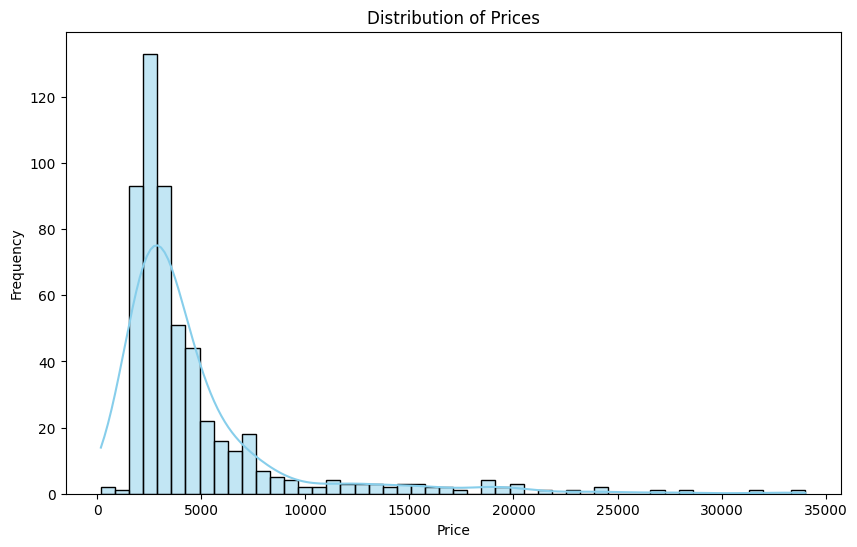

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['PRIX'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Poids

In [11]:
df['POIDS'].value_counts()

POIDS
2           93
1.5         73
1.6         50
1           40
1.28        22
            ..
1.64         1
:1,48kg      1
:1,78kg.     1
3,4          1
12           1
Name: count, Length: 88, dtype: int64

In [12]:
def extract_number(s):
    return re.sub(r'\D', '', str(s))

df['POIDS'] = df['POIDS'].apply(extract_number)

# CPU_Brand	 CPU_Modifier	CPU_Generation	

In [13]:
df[['CPU_Brand','CPU_Modifier','CPU_Generation']].value_counts()

CPU_Brand  CPU_Modifier  CPU_Generation
intel      i5            6.0               108
                         5.0                51
                         4.0                37
                         8.0                32
           i3            6.0                23
           i7            6.0                22
           i3            4.0                18
           i5            10.0               17
                         11.0               17
           i7            7.0                16
           i5            7.0                15
           i7            12.0               13
           i3            11.0               11
           i7            11.0                9
           i5            12.0                9
           i7            8.0                 8
           i3            10.0                7
           i7            10.0                5
amd        3             3.0                 5
           5             5.0                 5
ryzen      5        

It seems like the three attributes are generally in good shape. The only necessary adjustments are to remove the ‘i’ characters from the ‘CPU_Modifier’ column and to transform the values in the ‘CPU_brand’ column into new separate columns

In [14]:

df['CPU_Brand'] = df['CPU_Brand'].replace(np.nan, '')

# Remove 'i' from 'CPU_Modifier'
df['CPU_Modifier'] = df['CPU_Modifier'].str.replace('i', '')

# Get unique CPU brands
unique_brands = df['CPU_Brand'].unique()

# Create binary columns for each unique CPU brand
for brand in unique_brands:
    df[brand] = df['CPU_Brand'].apply(lambda x: 1 if brand.lower() in str(x).lower() else 0)



In [15]:
df[['intel','amd']].value_counts()

intel  amd
1      0      462
0      0       74
       1       13
Name: count, dtype: int64

In [16]:
df['intel'] = df['intel'].fillna(0)
df['amd'] = df['amd'].fillna(0)

# Delete rows where both 'Intel' and 'AMD' are 0
df = df[(df['intel'] != 0) | (df['amd'] != 0)]
df[['intel','amd']].value_counts()

intel  amd
1      0      462
0      1       13
Name: count, dtype: int64

In [17]:
df = pd.get_dummies(df, columns=['CPU_Brand'], prefix='')
df.rename(columns={'_intel': 'CPU_intel','_amd':'CPU_amd'}, inplace=True)

# ECRAN

In [18]:
df['ECRAN'].value_counts()

ECRAN
14"        96
6"         42
8cm        20
6cm        18
14pouce    18
3pouce     11
3"         10
5"          9
6pouce      7
0"          6
15pouce     4
cm          3
13pouce     2
5pouce      2
1"          1
1pouce      1
12pouce     1
0pouce      1
16"         1
33cm        1
Name: count, dtype: int64

Logiquement, les valeurs de la taille d'écran composées d'un seul chiffre ont un '1' au début, qui n'a pas été extrait lors du scrapping (je ne suis pas certain de la raison :) ). Nous allons donc ajouter un '1' à côté des chiffres isolés, suivis de l'unité 'pouces'

In [19]:
for index, row in df.iterrows():
    
    if re.search(r'^\d("|pouce)',str(row['ECRAN'])):
        df.at[index, 'ECRAN'] = re.sub(r'\D*','',str(row['ECRAN']))
        df.at[index, 'ECRAN'] =float(df.at[index, 'ECRAN'] )
        try:
            float_value=float('1'+re.sub(r'\D*','',str(row['ECRAN'])))
            df.at[index, 'ECRAN'] = float_value
        except:
            float_value=np.nan
            df.at[index, 'ECRAN'] = float_value
        
    elif re.search(r'cm',str(row['ECRAN'])):
        df.at[index, 'ECRAN'] = np.nan
    else:
        try:
            df.at[index, 'ECRAN'] = float(re.sub(r'\D*','',str(row['ECRAN'])))
        except:
            df.at[index, 'ECRAN']=np.nan 
    if df.at[index, 'ECRAN']in [30,0]:
         df = df.drop(index, axis=0)


In [20]:
df['ECRAN'].value_counts()

ECRAN
14.0    114
16.0     50
13.0     23
15.0     15
10.0      7
11.0      2
12.0      1
Name: count, dtype: int64

# Stockage

In [21]:
len(df)

475

In [22]:
df[['STOCKAGEHDD', 'STOCKAGESSD', 'TypeStockage', 'Stockage']].describe()

,STOCKAGEHDD,STOCKAGESSD,Stockage
count,23.0,262.000000,8.700000e+01
mean,1000.0,343.152672,1.572763e+06
std,0.0,257.084448,2.991768e+06
min,1000.0,32.000000,8.000000e+00
25%,1000.0,256.000000,2.560000e+02
50%,1000.0,256.000000,5.000000e+02
75%,1000.0,512.000000,1.000000e+03
max,1000.0,2512.000000,7.200000e+06


In [23]:
df[['STOCKAGEHDD', 'STOCKAGESSD', 'TypeStockage', 'Stockage']].isnull().sum()

STOCKAGEHDD     452
STOCKAGESSD     213
TypeStockage    133
Stockage        388
dtype: int64

 We have decided to replace rows where the type of storage is not specified (i.e., 'TypeStockage' is None or null) with 'hdd.' This decision is based on considerations related to the nature of the data and the importance of having a consistent type of storage value for analysis. By assigning a default value of 'hdd' to rows with missing storage type information, we aim to enhance the integrity and uniformity of the dataset, ensuring more meaningful and reliable insights during subsequent analyses

In [24]:
def update_storage_columns(row):
    if pd.notnull(row['TypeStockage']) and pd.notnull(row['Stockage']):
        if row['TypeStockage'] == 'hdd':
            row['STOCKAGEHDD'] = row['Stockage']
        elif row['TypeStockage'] == 'ssd':
            row['STOCKAGESSD'] = row['Stockage']
    if pd.isnull(row['TypeStockage'])and pd.notnull(row['Stockage']):
        row['STOCKAGEHDD'] = row['Stockage']
    return row

def fill_type(row):
    if pd.isnull(row['TypeStockage'])and pd.notnull(row['Stockage']):
        row['STOCKAGEHDD'] = row['Stockage']
    return row

df = df.apply(update_storage_columns, axis=1)
df = df.apply(update_storage_columns, axis=1)

Now that we have utilized the information from the **'TypeStockage'** and **'Stockage'** columns to update **STOCKAGEHDD'** and **'STOCKAGESSD'**, these two columns have effectively replaced the role of the original columns. Therefore, to streamline our dataset and remove redundant information, we have decided to remove the **'TypeStockage'** and **'Stockage'** columns

In [25]:
df.drop(['TypeStockage', 'Stockage'], axis=1, inplace=True)

we have addressed potential missing values in the 'STOCKAGEHDD' and 'STOCKAGESSD' columns. To ensure data completeness and facilitate subsequent analyses, any NaN values in these columns have been replaced with 0. This approach allows for a consistent representation of storage information, where a value of 0 signifies the absence of a specific storage type in the respective columns.

In [26]:
df['STOCKAGEHDD'].fillna(0, inplace=True)
df['STOCKAGESSD'].fillna(0, inplace=True)
df.head()

,RAM,typeRam,CPU_Modifier,CPU_Generation,GPU,STOCKAGEHDD,STOCKAGESSD,COULEUR,POIDS,ECRAN,...,_Asus,_DELL,_Hp,_Lenovo,,intel,amd,ryzen,CPU_amd,CPU_intel
1,4go,ddr3,3,4.0,: intel hd graphics family,0.0,0.0,noir,242,15.0,...,False,True,False,False,1,1,0,0,False,True
2,8gb,ddr4,5,6.0,. intel hd graphics 520,0.0,256.0,gris,128,NaN,...,False,False,True,False,1,1,0,0,False,True
4,16gb,ddr4,5,6.0,. intel hd graphics 520,0.0,0.0,gris,15,NaN,...,False,False,True,False,1,1,0,0,False,True
8,8go,ddr3,5,4.0,contrôleur graphique\tintel hd graphics 4600 (...,500.0,0.0,noir,2,14.0,...,False,False,True,False,1,1,0,0,False,True
9,8go,ddr3,3,4.0,contrôleur graphique\tintel hd graphics 4600 (...,0.0,7200000.0,noir,2,14.0,...,False,False,True,False,1,1,0,0,False,True


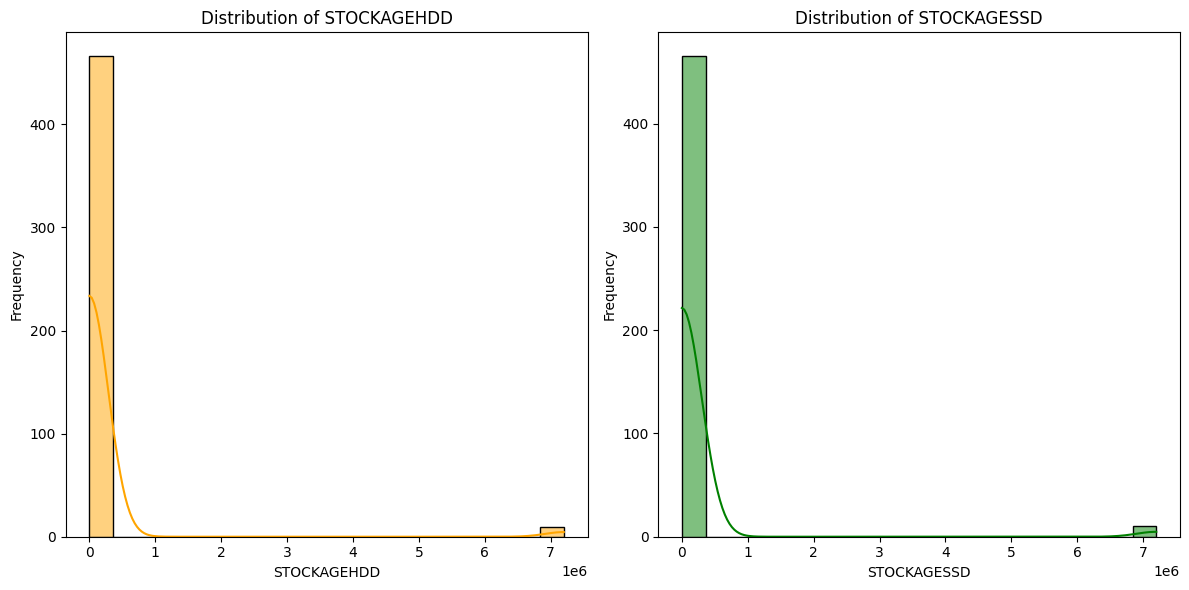

In [27]:

# Assuming df['STOCKAGEHDD'] and df['STOCKAGESSD'] are numeric columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['STOCKAGEHDD'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of STOCKAGEHDD')
plt.xlabel('STOCKAGEHDD')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['STOCKAGESSD'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of STOCKAGESSD')
plt.xlabel('STOCKAGESSD')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
df['STOCKAGESSD'].value_counts()

STOCKAGESSD
0.0          203
256.0        153
512.0         57
128.0         18
7200000.0     10
1000.0         9
240.0          6
32.0           5
500.0          4
8.0            2
840.0          2
160.0          2
2512.0         1
250.0          1
480.0          1
2256.0         1
Name: count, dtype: int64

The plot indicates a long tail in the distribution, suggesting the presence of a few laptops with exceptionally high SSD storage values, such as 7200000.0 GB. These values are likely outliers and significantly skew the distribution. To address this issue and ensure a more representative visualization, we will proceed to remove these outliers from the dataset

In [29]:
df = df[(df['STOCKAGESSD'] <= 3000) & (df['STOCKAGEHDD'] <= 3000)]


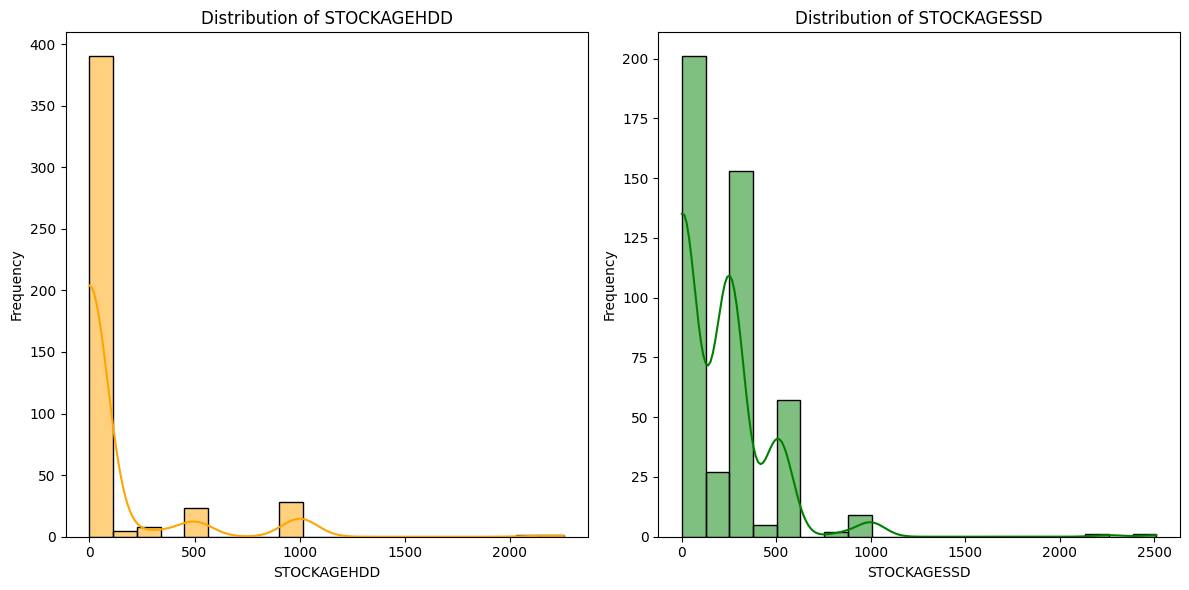

In [30]:
# Assuming df['STOCKAGEHDD'] and df['STOCKAGESSD'] are numeric columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['STOCKAGEHDD'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of STOCKAGEHDD')
plt.xlabel('STOCKAGEHDD')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['STOCKAGESSD'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of STOCKAGESSD')
plt.xlabel('STOCKAGESSD')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## GPU

let's visualise the 'GPU' column values

In [31]:

word_counts = Counter()
df['GPU'] = df['GPU'].str.lower()
for _, row in df.iterrows():
    if isinstance(row['GPU'], str):
        #this if will help handling NaN
        words = row['GPU'].split()
        word_counts.update(words)

for key,value in word_counts.items():
    print(f'{key}\t:\t {value}')

:	:	 200
intel	:	 184
hd	:	 157
graphics	:	 193
family	:	 5
.	:	 30
520	:	 85
contrôleur	:	 34
graphique	:	 178
4600	:	 14
(intégré	:	 16
au	:	 17
processeur)	:	 16
graphique:	:	 32
4400	:	 3
carte	:	 178
id	:	 3
de	:	 16
la	:	 9
intégrée	:	 22
0x1616	:	 3
microprocesseur	:	 1
processeur	:	 2
amd	:	 12
ryzen™	:	 1
5	:	 1
4500u	:	 1
avec	:	 8
radeon™	:	 6
vega	:	 1
8	:	 1
(2,1	:	 1
ghz	:	 2
fréquence	:	 4
base,	:	 1
jusqu’à	:	 1
3,7	:	 1
rafale,	:	 1
6	:	 2
mo	:	 1
mémoire	:	 1
cache,	:	 1
4	:	 7
cœurs)	:	 1
dynamique	:	 2
(max)	:	 2
1150	:	 2
mhz	:	 2
5500	:	 22
intel®	:	 73
uhd	:	 67
600	:	 15
sorties	:	 3
prises	:	 3
en	:	 3
charge	:	 3
displayport,	:	 1
embedded	:	 3
displayport	:	 1
(edp),	:	 3
hdmi	:	 7
oui	:	 7
620	:	 27
display	:	 4
port,	:	 2
port	:	 16
nvidia®	:	 2
geforce®	:	 2
mx330	:	 1
2go	:	 1
nvidia	:	 8
ada	:	 1
lovelace	:	 1
geforce	:	 2
rtx	:	 3
4050	:	 1
go	:	 4
gddr6	:	 3
dédiés,	:	 1
iris	:	 17
xe	:	 31
et	:	 3
optimus	:	 1
résolution	:	 1
maximum	:	 1
(displayport

After examining the values in the ‘GPU’ column, we notice the presence of non-word characters that are irrelevant in this context and could potentially cause issues later. Therefore, we should remove them.

In [32]:

df['GPU'] = df['GPU'].str.replace(r'[^\w\s]', '', regex=True)

Now, let’s examine the count of various words that constitute the values in the ‘GPU’ column

In [33]:
nvidia_gpu_values = df[df['GPU'].str.contains('nvidia', na=False)]['GPU'].unique()
print(nvidia_gpu_values)


['carte graphique nvidia geforce mx330 2go'
 'carte graphique nvidia ada lovelace geforce rtx 4050 6 go gddr6 dédiés intel iris xe intégrée au processeur et nvidia optimus'
 'carte graphique 2  nvidia\xa0quadro t1000 maxq design 4go'
 'carte graphique nvidia geforce mx350 2g'
 'carte graphique\xa02 \xa0\xa0nvidia quadro m2000m  4go gddr5'
 'carte graphique nvidia quadro t1000  4 go gddr5'
 '\xa0nvidia rtx 3050ti 4 go gddr6'
 'carte graphique  nvidia rtx a1000 4 gb gddr6  intel iris xe graphics'
 'carte graphique  nvidia geforce rtx 3050\xa0 4 go gddr6intel iris xe graphics']


In [34]:
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('hd') & df['GPU'].str.contains('520'), 'GPU'] = 'Intel HD Graphics 520'
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('hd') & df['GPU'].str.contains('530'), 'GPU'] = 'Intel HD Graphics 530'
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('hd') & df['GPU'].str.contains('4400'), 'GPU'] = 'Intel HD Graphics 400'
df.loc[df['GPU'].str.contains('intel') & (df['GPU'].str.contains('uhd')|df['GPU'].str.contains('hd')) & (df['GPU'].str.contains('600')|df['GPU'].str.contains('6000')), 'GPU'] = 'Intel UHD Graphics 620'

df.loc[df['GPU'].str.contains('radeon') & df['GPU'].str.contains('vega') & df['GPU'].str.contains('8'), 'GPU'] = 'readon vega 8'
df.loc[df['GPU'].str.contains('amd') & df['GPU'].str.contains('radeon') & (df['GPU'].str.contains('graphics')|df['GPU'].str.contains('graphique')), 'GPU'] = 'AMD Graphique'
df.loc[df['GPU'].str.contains('graphiques') & df['GPU'].str.contains('intégrés') , 'GPU'] = 'carte graphiques intégré'
df.loc[df['GPU'].str.contains('graphique') & df['GPU'].str.contains('intégré')& df['GPU'].str.contains('4600') , 'GPU'] = 'carte graphique 4600 intégré' 

df.loc[df['GPU'].str.contains('graphique') & df['GPU'].str.contains('intégrée') , 'GPU'] = 'carte graphiques intégré'
df['GPU'] = df['GPU'].apply(lambda x: 'Intel UHD Graphiques' if (isinstance(x, str) and 'intel' in x.lower() and 'uhd' in x.lower() and not any(char.isdigit() for char in x)) else x)
df['GPU'] = df['GPU'].apply(lambda x: 'Intel HD Graphiques' if (isinstance(x, str) and 'intel' in x.lower() and 'hd' in x.lower() and not any(char.isdigit() for char in x)) else x)
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('hd') & df['GPU'].str.contains('5500'), 'GPU'] = 'Intel HD Graphics 530'
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('hd') & df['GPU'].str.contains('620'), 'GPU'] = 'Intel HD Graphics 620'
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('iris') & df['GPU'].str.contains('xe'), 'GPU'] = 'Intel Iris'
df.loc[df['GPU'].str.contains('intel') & df['GPU'].str.contains('iris') & df['GPU'].str.contains('xᵉ'), 'GPU'] = 'Intel Iris'  
df.loc[df['GPU'].str.contains('nvidia') & df['GPU'].str.contains('rtx') & df['GPU'].str.contains('3050'), 'GPU'] = 'Nvidia  RTX'
df.loc[df['GPU'].str.contains('nvidia') & df['GPU'].str.contains('quadro') , 'GPU'] ='Nvidia  Quadro'
df.loc[df['GPU'].str.contains('nvidia') & df['GPU'].str.contains('geforce') & df['GPU'].str.contains('mx'), 'GPU'] = 'Nvidia  MX'

gpu_counts = df['GPU'].value_counts()

# Create a mask where each 'GPU' value is repeated more than once
mask = df['GPU'].isin(gpu_counts[gpu_counts > 2].index)

# Apply the mask to the DataFrame
df = df[mask]

In [35]:
df['GPU'].value_counts()

GPU
Intel HD Graphics 520       86
Intel HD Graphiques         54
Intel Iris                  34
Intel UHD Graphics 620      29
Intel HD Graphics 620       25
Intel HD Graphics 530       22
carte graphiques intégré    19
AMD Graphique                9
Intel HD Graphics 400        3
Nvidia  Quadro               3
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Intel HD Graphiques'),
  Text(1, 0, 'Intel HD Graphics 520'),
  Text(2, 0, 'Intel UHD Graphics 620'),
  Text(3, 0, 'Intel HD Graphics 400'),
  Text(4, 0, 'carte graphiques intégré'),
  Text(5, 0, 'Intel HD Graphics 530'),
  Text(6, 0, 'Intel HD Graphics 620'),
  Text(7, 0, 'Intel Iris'),
  Text(8, 0, 'AMD Graphique'),
  Text(9, 0, 'Nvidia  Quadro')])

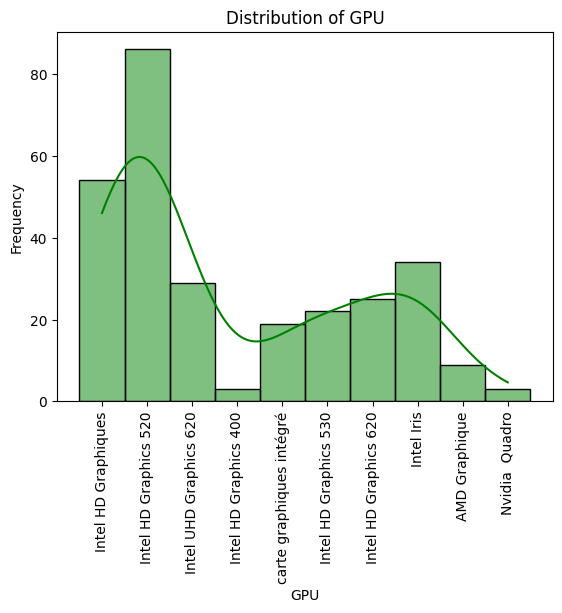

In [36]:
sns.histplot(df['GPU'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of GPU')
plt.xlabel('GPU')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

In [37]:
df = pd.get_dummies(df, columns=['GPU'], prefix='Grapihque')

## Rate

In [38]:
df['RATE'] = df['RATE'].str.extract('(\d+\.?\d*)').astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lokmane\AppData\Local\Temp\ipykernel_16740\2026903966.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['RATE'] = df['RATE'].str.extract('(\d+\.?\d*)').astype(float)


In [39]:
df['RATE'].value_counts()/len(df)

RATE
0.0    0.651408
4.0    0.070423
5.0    0.066901
1.0    0.038732
3.0    0.028169
4.5    0.017606
3.5    0.017606
2.0    0.017606
3.6    0.014085
3.7    0.010563
2.7    0.007042
2.3    0.007042
4.2    0.007042
4.8    0.007042
3.9    0.007042
3.8    0.007042
3.4    0.003521
4.3    0.003521
3.3    0.003521
2.5    0.003521
4.7    0.003521
3.1    0.003521
4.1    0.003521
Name: count, dtype: float64

As observed in the previous steps, the 'RATE' column contains a substantial number of null values, with approximately +68% of the dataset having a rating of 0. Given the prevalence of missing or unrated values, and to simplify the analysis, we have decided to remove the entire 'RATE' column from the dataset. This is a strategic choice to address the high proportion of missing values and ensure a more focused and accurate analysis in subsequent steps

In [40]:
df.drop('RATE', axis=1, inplace=True)

## COULEUR

In order to incorporate the categorical information of the 'COULEUR' (color) column into our machine learning model, we applied one-hot encoding. This technique transforms the categorical variable into a set of binary columns, each representing a distinct color category. The resulting one-hot encoded columns, such as 'COULEUR_red,' 'COULEUR_blue,' and 'COULEUR_green,' effectively capture the presence or absence of each color for every observation. By adopting one-hot encoding, we ensure that the categorical nature of colors is appropriately represented

In [41]:
df['COULEUR'].value_counts()

COULEUR
noir                 125
gris                  55
argent                26
noiretargent          13
argentnoir            10
argentetnoir           6
grisnoir               3
rose                   3
bleu                   3
argentcendréfoncé      3
abyssblue              2
noirargenté            2
grismétallisé          1
noirargentfoncé        1
grey                   1
grisfer                1
grissidéral            1
noirgris               1
peacockblue            1
duproduitargent        1
Name: count, dtype: int64

In [42]:
color_mapping = {
    'noir': 'noir',
    'gris': 'gris',
    'argent': 'gris',
    'noiretargent': 'noirgris', 
    'argentetnoir': 'noirgris',  
    'argentnoir': 'noirgris',  
    'argentcendréfoncé': 'gris',
    'grisnoir': 'gris',
    'grey': 'gris',
    'grisfer': 'gris',
    'grissidéral': 'gris',
    'noire': 'noir',
    'noirargent': 'noirgris',
    'noirargenté': 'noir', 
    'noirargentfoncé': 'noirgris',
    'grismétallisé': 'gris',
    'duproduitargent':'gris',
    'abyssblue':'bleu',
    'peacockblue':'bleu',
    'silver':'gris',
    'noireargent' :'noirgris',
    'grisnoir':'noirgris',
}

# Apply the mapping to the 'COULEUR' column
# df['COULEUR'] = df['COULEUR'].replace(color_mapping)

In [43]:
# df = pd.get_dummies(df, columns=['COULEUR'], prefix='COULEUR')
df.drop('COULEUR', axis=1, inplace=True)

# RAM & TypeRam

Now, we will proceed with data cleaning by extracting only the numerical values from the 'RAM' column and removing any non-numeric characters

In [44]:
def extract_number(s):
    return re.sub(r'\D', '', str(s))

df['RAM'] = df['RAM'].apply(extract_number)
df['RAM'].value_counts()

RAM
8     121
16     66
4      55
32     17
00     11
12      6
64      4
82      2
84      2
Name: count, dtype: int64

In [45]:
df['RAM'] = pd.to_numeric(df['RAM'])

df = df[~df['RAM'].isin([82, 84])]

for column in df.columns:
    df['RAM'].fillna(df['RAM'].mode()[0], inplace=True)
df['RAM'] = df['RAM'].replace(0, 8)

In [46]:
df['typeRam'].value_counts()

typeRam
ddr4    196
ddr3     61
Name: count, dtype: int64


Now, we will proceed with data cleaning by extracting only the numerical values from the 'typeRam' column and removing any non-numeric characters

In [47]:
df['typeRam'] = df['typeRam'].replace('ddr3',1)
df['typeRam'] = df['typeRam'].replace('ddr4',2)

In [48]:
df['typeRam'].value_counts()

typeRam
2.0    196
1.0     61
Name: count, dtype: int64

In [49]:
df.drop('typeRam', axis=1, inplace=True)

# final result

In [50]:
df.sample(20)

,RAM,CPU_Modifier,CPU_Generation,STOCKAGEHDD,STOCKAGESSD,POIDS,ECRAN,PRIX,_Asus,_DELL,...,Grapihque_AMD Graphique,Grapihque_Intel HD Graphics 400,Grapihque_Intel HD Graphics 520,Grapihque_Intel HD Graphics 530,Grapihque_Intel HD Graphics 620,Grapihque_Intel HD Graphiques,Grapihque_Intel Iris,Grapihque_Intel UHD Graphics 620,Grapihque_Nvidia Quadro,Grapihque_carte graphiques intégré
240,8,5,8.0,0.0,256.0,2,NaN,3240.0,False,False,...,False,False,False,False,False,True,False,False,False,False
214,8,5,5.0,0.0,256.0,2,15.0,2999.0,False,True,...,False,False,False,False,True,False,False,False,False,False
517,64,5,12.0,0.0,256.0,128,NaN,13270.0,False,False,...,False,False,False,False,False,True,False,False,False,False
261,16,5,6.0,0.0,256.0,15,14.0,2490.0,False,False,...,False,False,True,False,False,False,False,False,False,False
387,4,3,11.0,0.0,256.0,2,16.0,4500.0,False,False,...,False,False,False,False,False,False,True,False,False,False
87,16,7,7.0,0.0,256.0,16,14.0,3899.0,False,False,...,False,False,False,False,False,False,False,False,False,True
61,8,5,8.0,0.0,256.0,148,14.0,3399.0,False,False,...,False,False,False,False,False,False,False,False,False,True
93,16,5,8.0,0.0,512.0,128,13.0,4700.0,False,False,...,False,False,False,False,True,False,False,False,False,False
16,8,5,6.0,0.0,0.0,29,NaN,2799.0,False,False,...,False,False,True,False,False,False,False,False,False,False
461,4,3,4.0,320.0,0.0,2,14.0,1699.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [51]:
def convert_boolean_to_binary(df):
    for column in df.columns:
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)
    return df
df = convert_boolean_to_binary(df)


In [52]:

len(df)

280

In [53]:
df.head()

,RAM,CPU_Modifier,CPU_Generation,STOCKAGEHDD,STOCKAGESSD,POIDS,ECRAN,PRIX,_Asus,_DELL,...,Grapihque_AMD Graphique,Grapihque_Intel HD Graphics 400,Grapihque_Intel HD Graphics 520,Grapihque_Intel HD Graphics 530,Grapihque_Intel HD Graphics 620,Grapihque_Intel HD Graphiques,Grapihque_Intel Iris,Grapihque_Intel UHD Graphics 620,Grapihque_Nvidia Quadro,Grapihque_carte graphiques intégré
1,4,3,4.0,0.0,0.0,242,15.0,1499.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,8,5,6.0,0.0,256.0,128,NaN,2490.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,16,5,6.0,0.0,0.0,15,NaN,2899.0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,8,5,4.0,500.0,0.0,2,14.0,1999.0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,16,5,6.0,0.0,256.0,16,NaN,2599.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
df.to_csv('DATA/Cleaned_data.csv', index=False)